In [1]:
import numpy as np
from keras.models import  Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, Conv2D
from keras.utils import np_utils
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField
from pyts.image import RecurrencePlot
from pyts.image import MarkovTransitionField
from pyts.datasets import load_gunpoint
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.
C:\Users\afecn\anaconda3.1\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\afecn\anaconda3.1\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\afecn\anaconda3.1\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\afecn\anaconda3.1\lib\site-packages\tensorflow\python\framework\d

In [27]:
df = pd.read_csv('E:/База/MicexD/IMOEX_060101_190529.csv')
data=df.filter(['<CLOSE>'])
dataset = np.array(data)
dataset
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)


In [28]:
dataset

array([[0.2594196 ],
       [0.27029914],
       [0.28992654],
       ...,
       [0.99083804],
       [0.99728953],
       [0.98638646]])

In [29]:
n=50

In [30]:
data['dataset']   = dataset
data['return']    = ((data['<CLOSE>'].shift(-n-1))/data['<CLOSE>'].shift(-n)-1)*100
data['return_+-'] = np.where(data['return']>0, 1, 0)
display(data)
#display(data.shift(1))

,<CLOSE>,dataset,return,return_+-
0,1064.91,0.259420,0.163603,1
1,1088.03,0.270299,0.005419,1
2,1129.74,0.289927,-1.457554,0
3,1114.21,0.282619,-1.668421,0
4,1150.34,0.299620,3.527664,1
...,...,...,...,...
3345,2638.71,1.000000,NaN,0
3346,2618.61,0.990542,NaN,0
3347,2619.24,0.990838,NaN,0
3348,2632.95,0.997290,NaN,0


In [31]:
close100 = []
for i in range(0, len(dataset)-n):
    close100.append(dataset[i:i+n,])
close100 = np.array(close100)    
display(close100.shape)
close100= np.reshape(close100, (close100.shape[0],close100.shape[1])) 
display(close100.shape)

(3300, 50, 1)

(3300, 50)

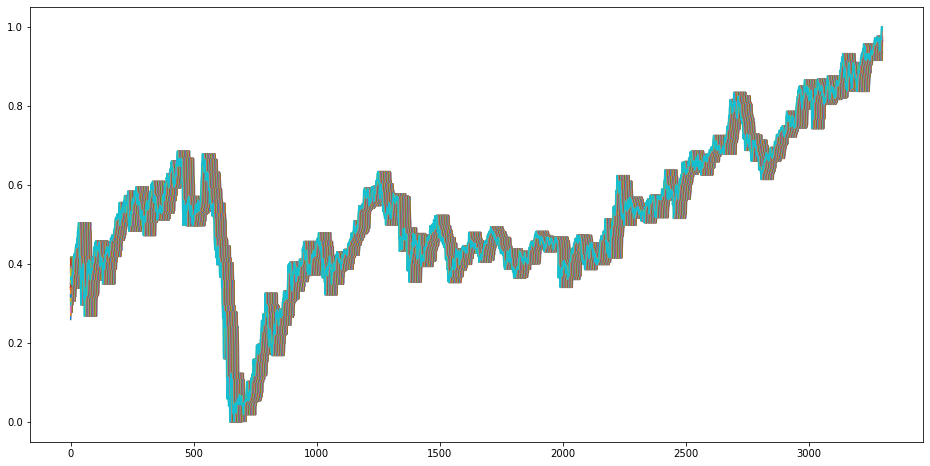

In [32]:
plt.figure(figsize = (16, 8))
plt.plot(np.reshape(close100, (close100.shape[0], close100.shape[1])))
plt.show()

In [47]:
X_gasf_all = []
X_gadf_all = []
X_rp_all   = []

for i in range(0,len(close100),1):
    X = close100[i]
    # Transform the time series into Gramian Angular Fields
    gasf = GramianAngularField(image_size=n, method='summation')
    X_gasf = gasf.fit_transform(X.reshape(1,-1))
    gadf = GramianAngularField(image_size=n, method='difference')
    X_gadf = gadf.fit_transform(X.reshape(1,-1))
#     rp = RecurrencePlot(threshold='point', percentage=20)
#    X_rp = rp.fit_transform(X.reshape(1,-1))
#    mtf = MarkovTransitionField(image_size=24)
#    X_mtf = mtf.fit_transform(X.reshape(1,-1))
    X_gasf_all.append(X_gasf)
    X_gadf_all.append(X_gadf)

X_gasf_all = np.array(X_gasf_all)
X_gadf_all = np.array(X_gadf_all)

In [38]:
X_gasf_all.shape

(3300, 1, 50, 50)

In [51]:
X.shape

(50,)

In [55]:
dataset[0:50]

array([[0.2594196 ],
       [0.27029914],
       [0.28992654],
       [0.28261862],
       [0.29962025],
       [0.28759723],
       [0.27767765],
       [0.29842501],
       [0.30841517],
       [0.29668391],
       [0.30576587],
       [0.3131585 ],
       [0.31692305],
       [0.33571755],
       [0.31657953],
       [0.30954924],
       [0.32360982],
       [0.32070171],
       [0.30593057],
       [0.32027349],
       [0.31643836],
       [0.32536504],
       [0.34068204],
       [0.33680926],
       [0.34095497],
       [0.3432184 ],
       [0.34066322],
       [0.34889346],
       [0.37053489],
       [0.38758829],
       [0.37850632],
       [0.39294806],
       [0.41666941],
       [0.41181315],
       [0.37984744],
       [0.38724478],
       [0.39141872],
       [0.39313159],
       [0.38741889],
       [0.35213097],
       [0.3402303 ],
       [0.3384092 ],
       [0.35845541],
       [0.34203728],
       [0.34916168],
       [0.34824878],
       [0.36454927],
       [0.356

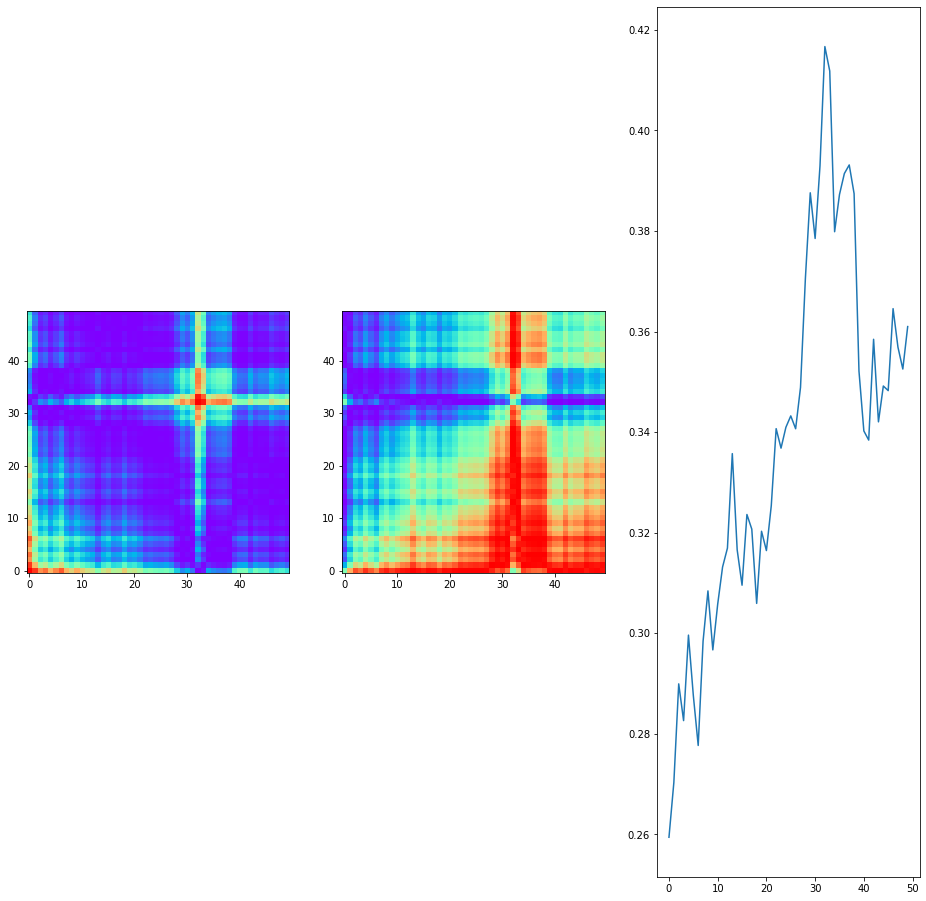

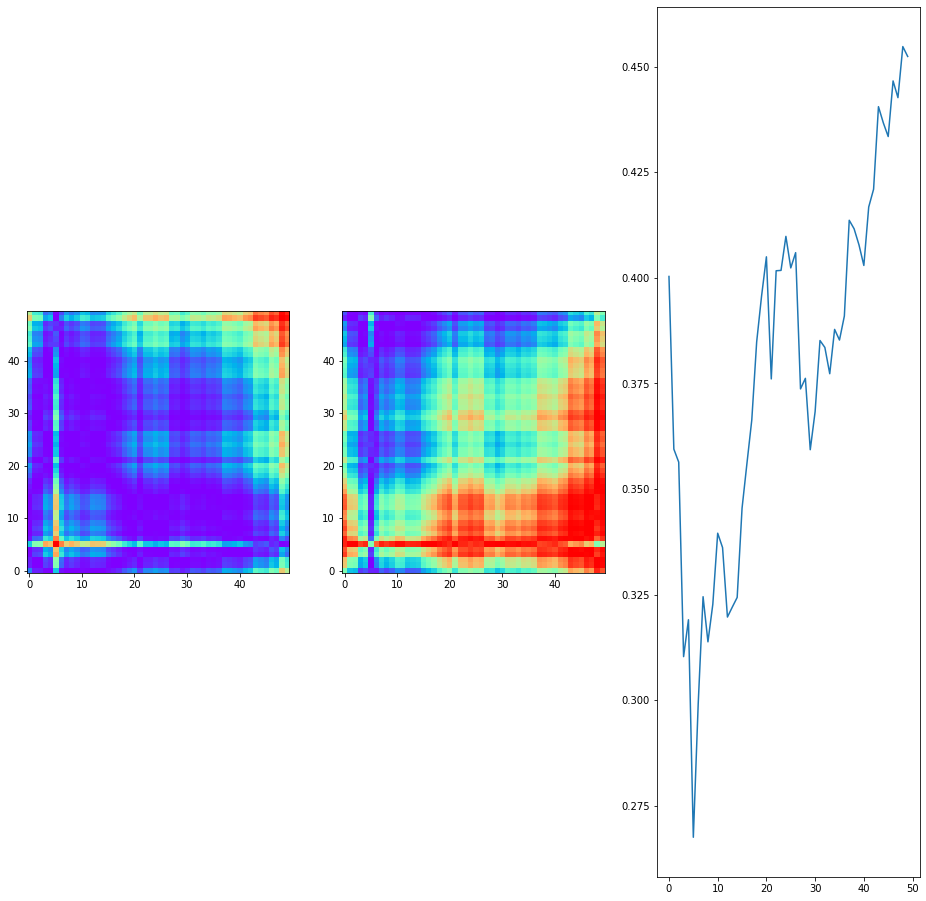

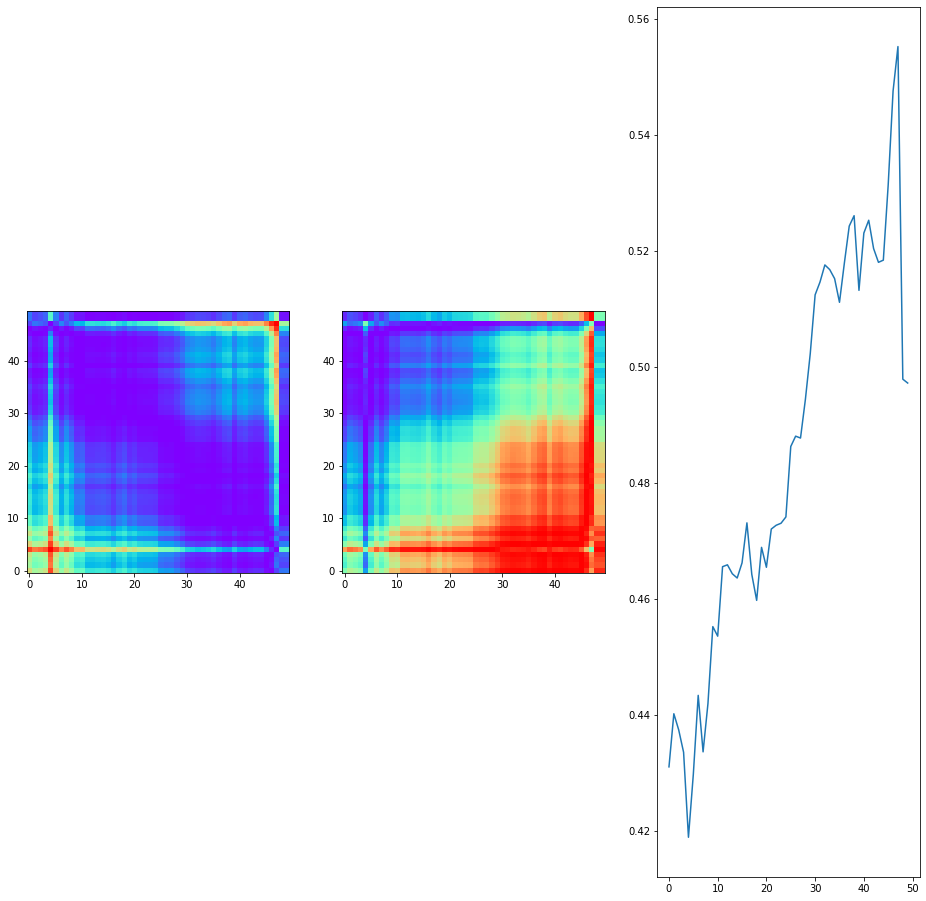

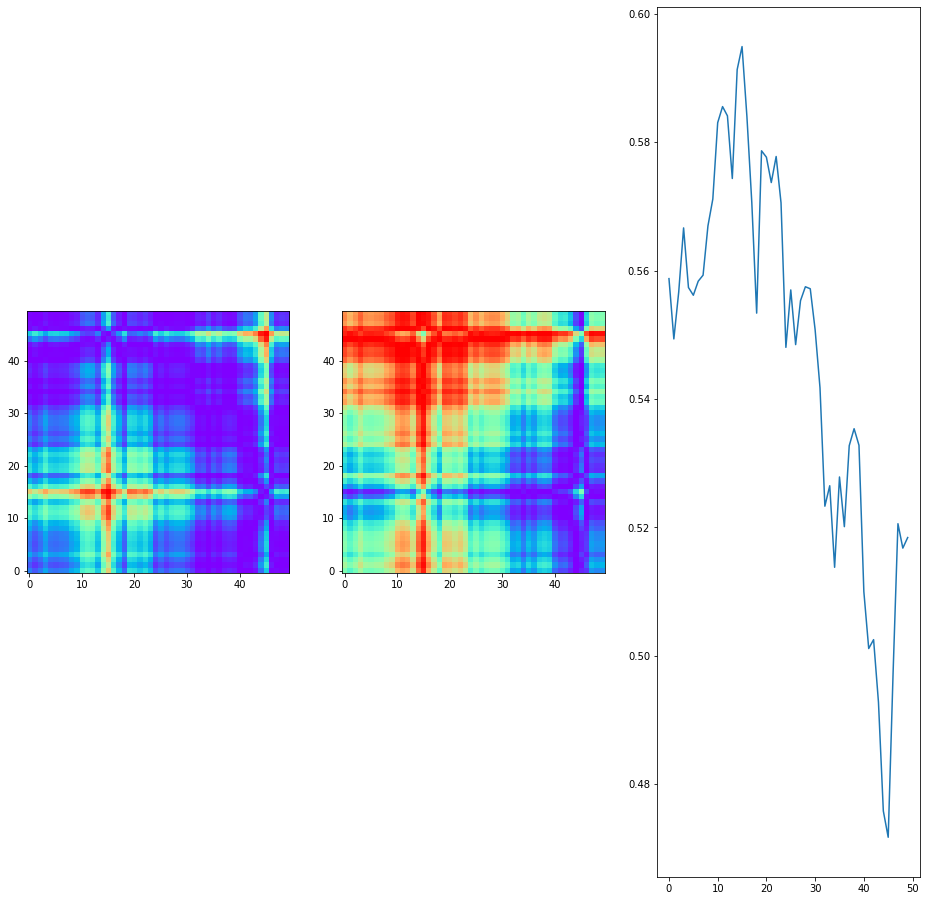

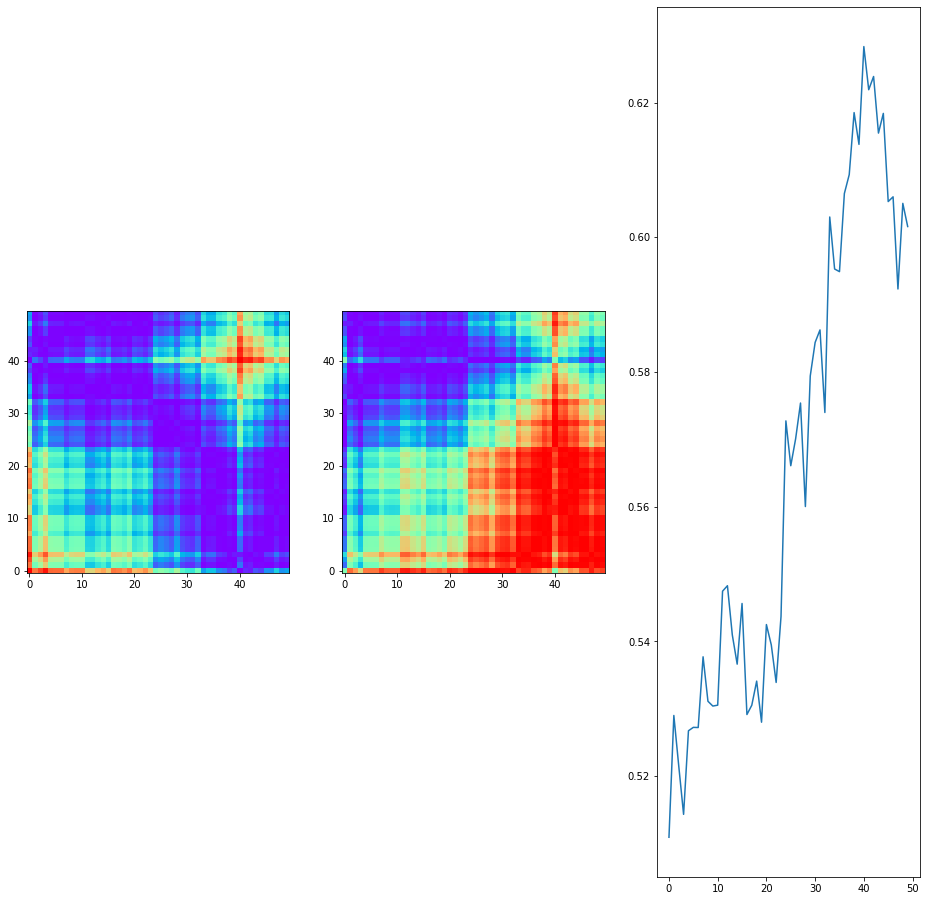

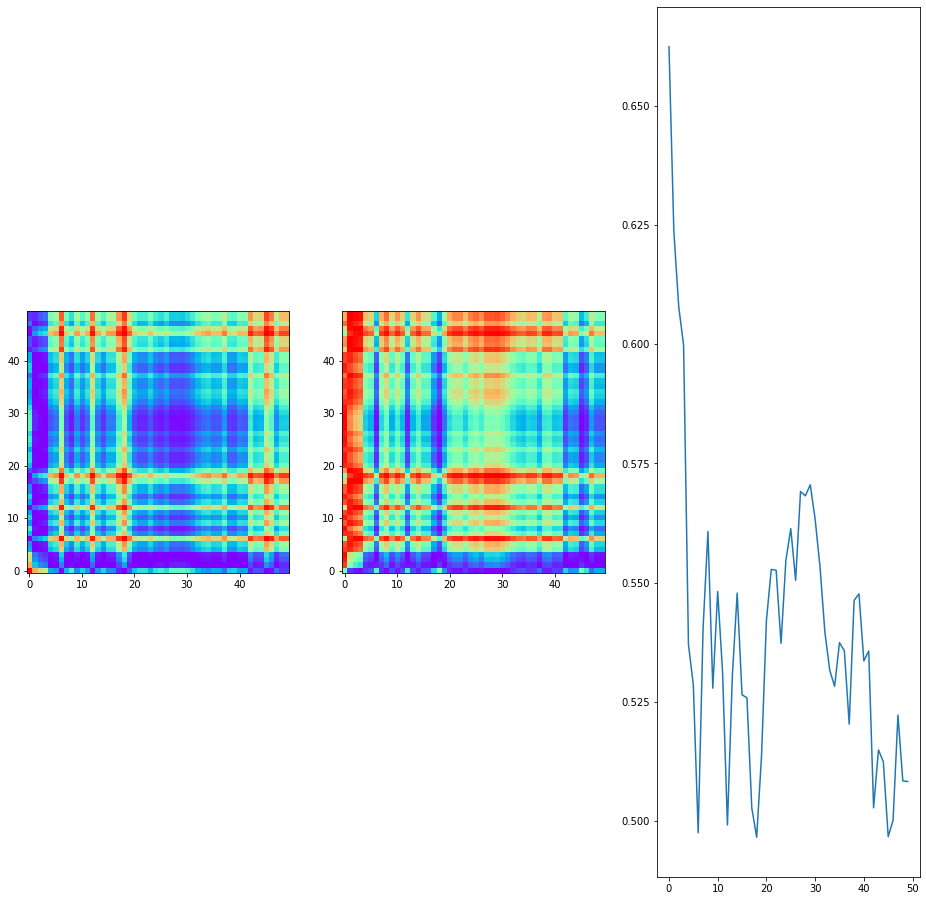

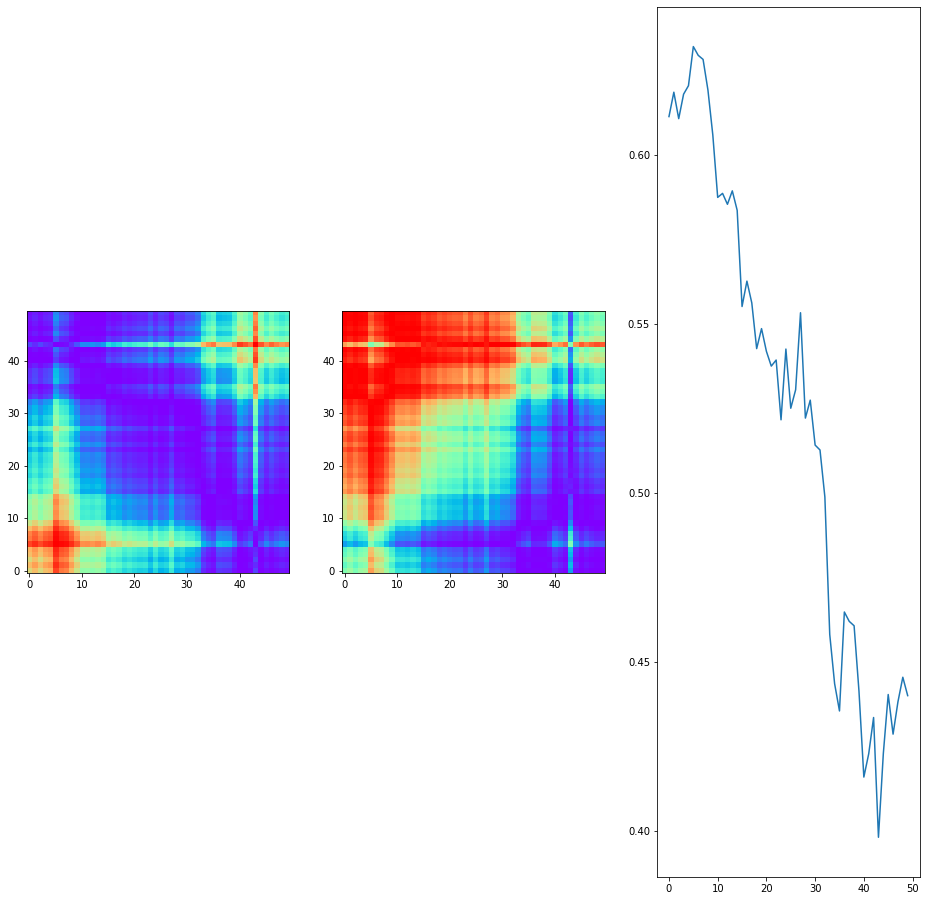

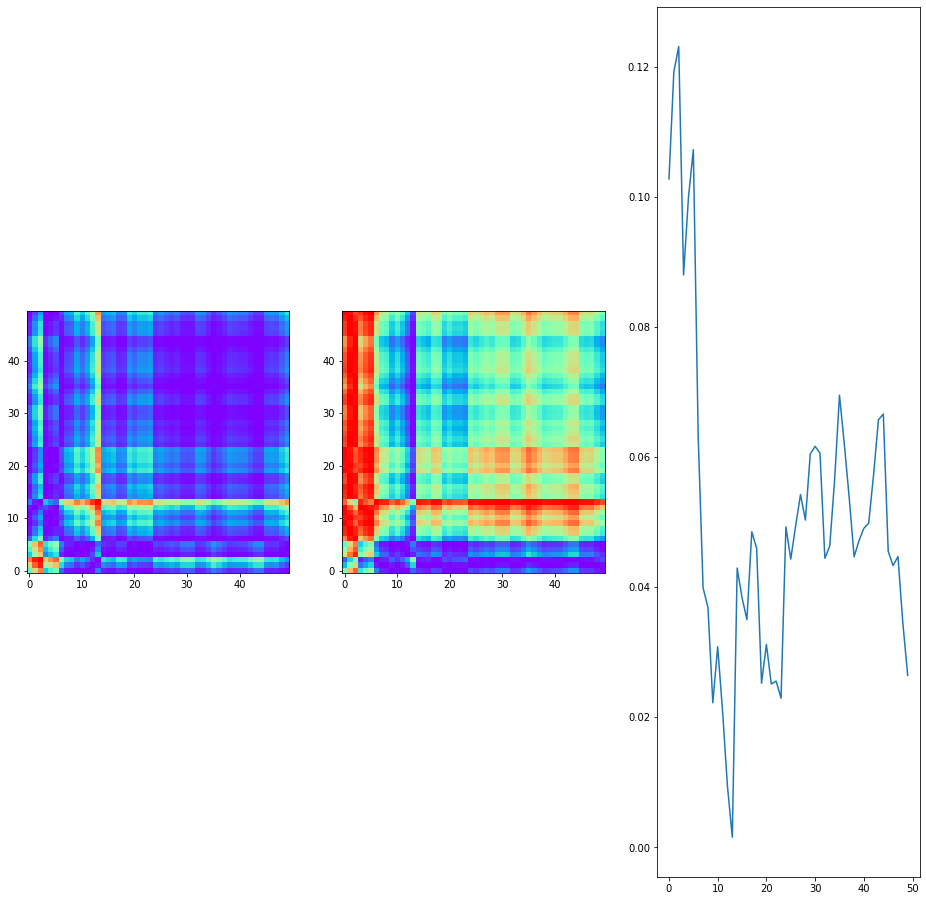

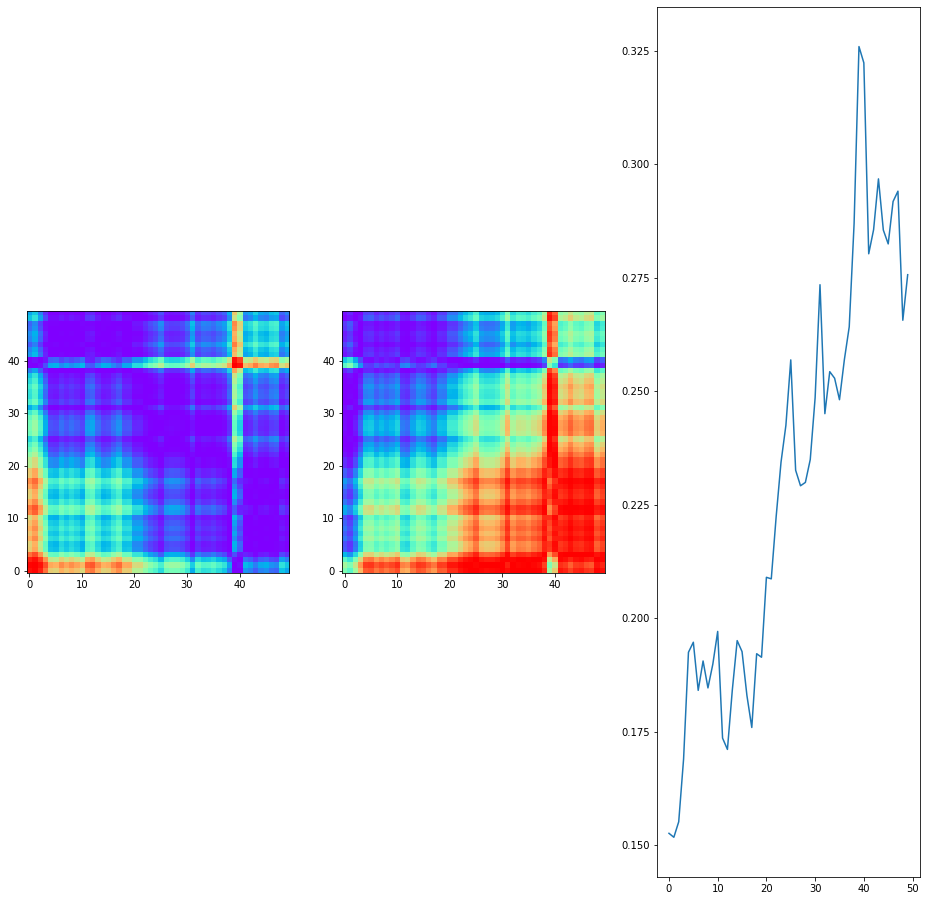

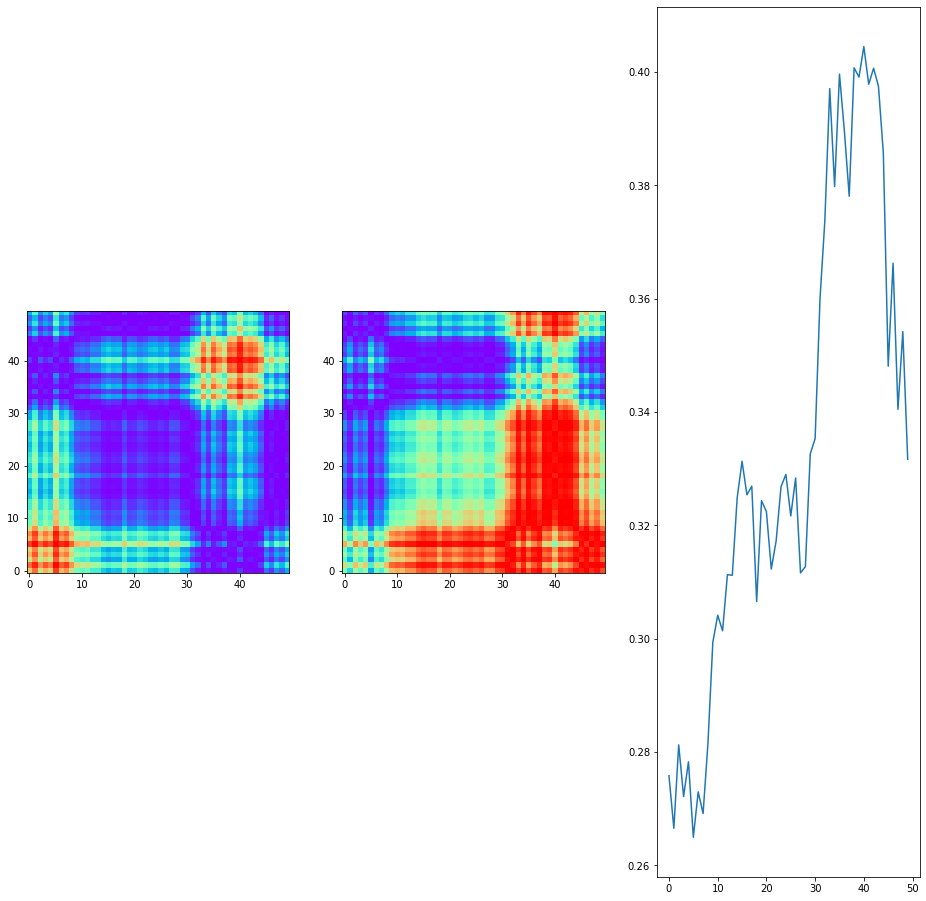

In [59]:
# Show the images for the first time series
X_gasf_all_p = np.reshape(X_gasf_all, (X_gasf_all.shape[0],n,n))
X_gadf_all_p = np.reshape(X_gadf_all, (X_gadf_all.shape[0],n,n))

for i in range(0,1000,100):
    fig, axes = plt.subplots(ncols=3, figsize = (16,16))
    axes[0].imshow(X_gasf_all_p[i], cmap='rainbow', origin='lower')
    axes[1].imshow(X_gadf_all_p[i], cmap='rainbow', origin='lower')
 #   axes[2].imshow(X_rp[0],   cmap='binary',  origin='lower')
    axes[2].plot(dataset[i:i+50])
    plt.show()


In [58]:
X_gadf_all = np.array(X_gadf_all)
X_gadf_all = np.reshape(X_gadf_all, (X_gadf_all.shape[0],X_gadf_all.shape[2],X_gadf_all.shape[3]))
X_gadf_all = np.reshape(X_gadf_all, (X_gadf_all.shape[0],n,n,1))
X_gadf_all.shape

(3300, 50, 50, 1)

In [61]:
#Notmalization
X_train = X_train.astype('float32')
X_test  = X_test. astype('float32')
X_train /= 255
X_test  /= 255

In [62]:
#Kategory
Y_train = np_utils.to_categorical(y_train,2)
Y_test  = np_utils.to_categorical(y_test,2)

In [110]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(25, 25), padding='valid', input_shape=(n,n,1),
                 activation='relu',data_format="channels_last")) # (2)
model.add(Conv2D(filters=32, kernel_size=(15, 15),
                 activation='relu',data_format="channels_last")) # (3)
model.add(MaxPooling2D(pool_size=(2,2), data_format='channels_last')) # (4)
model.add(Dropout(0.25)) # Добавим слой регуляризации 
model.add(Conv2D(64, (3, 3), padding='valid', activation='relu',data_format="channels_last")) # (5)
model.add(Conv2D(64, (3, 3), activation='relu',data_format="channels_last")) # (6)
model.add(MaxPooling2D(pool_size=(2,2), data_format='channels_last')) # (7)
model.add(Dropout(0.25)) # Добавим слой регуляризации 
model.add(Flatten())
model.add(Dense(512, activation='relu')) # (8)
model.add(Dropout(0.5)) # Добавим слой регуляризации 
model.add(Dense(2, activation='softmax')) # (9)

In [118]:
#Compile
model.compile(loss = 'categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
#Fit
model.fit(X_train, Y_train, batch_size=32, nb_epoch = 5, validation_split=0.1, shuffle=True)

C:\Users\afecn\anaconda3.1\lib\site-packages\ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Train on 2700 samples, validate on 300 samples
Epoch 1/5
2700/2700 [==============================] - 6s 2ms/step - loss: 0.6929 - accuracy: 0.5133 - val_loss: 0.6933 - val_accuracy: 0.5033
Epoch 2/5
2700/2700 [==============================] - 5s 2ms/step - loss: 0.6929 - accuracy: 0.5133 - val_loss: 0.6933 - val_accuracy: 0.5033
Epoch 3/5
2700/2700 [==============================] - 5s 2ms/step - loss: 0.6929 - accuracy: 0.5133 - val_loss: 0.6933 - val_accuracy: 0.5033
Epoch 4/5
2700/2700 [==============================] - 5s 2ms/step - loss: 0.6929 - accuracy: 0.5133 - val_loss: 0.6933 - val_accuracy: 0.5033
Epoch 5/5
2700/2700 [==============================] - 5s 2ms/step - loss: 0.6929 - accuracy: 0.5133 - val_loss: 0.6934 - val_accuracy: 0.5033


In [112]:
predict_test        = pd.DataFrame(model.predict_proba(X_test))
predict__test       = pd.DataFrame(model.predict(X_test))
predict_train  = pd.DataFrame(model.predict_proba(X_train))
predict__train = pd.DataFrame(model.predict_proba(X_train))
predict__train

,0,1
0,0.486854,0.513146
1,0.486858,0.513142
2,0.486869,0.513131
3,0.486870,0.513130
4,0.486869,0.513131
...,...,...
2995,0.486815,0.513185
2996,0.486810,0.513190
2997,0.486807,0.513193
2998,0.486812,0.513188


In [95]:
predict__train[1].agg(['mean', 'max'])

mean    0.513719
max     0.513877
Name: 1, dtype: float64

In [114]:
data['return_+-'].agg(['mean'])

mean    0.506567
Name: return_+-, dtype: float64

In [201]:
scores = model.evaluate(X_test, Y_test, verbose = 0)
print('Test Accuracy: %.2f%%' % (scores[1]*100))

Test Accuracy: 53.67%


In [ ]:
score = model.evaluate(X_train, )